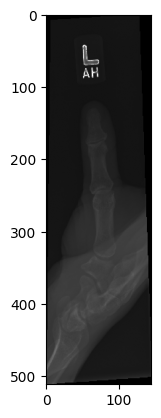

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import os

current_folder = os.getcwd()
image_path = os.path.join(current_folder, "MURA-v1.1")
# load and visualize the image
img = Image.open(f"{image_path}"+"/train/XR_FINGER/patient00169/study1_negative/image1.png").convert("L")
plt.imshow(img, cmap='gray')
plt.show()

## 確認cvs中的資料label格式

In [6]:
# get the label of the image (show from cvs)
import pandas as pd
meta = pd.read_csv(f"{image_path}"+"\\train_labeled_studies.csv",header=None, names=['path','label'])
meta.head()

,path,label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1


## 檢查每一種部位的x-ray +/- 數目為多少 by cvs

In [17]:
# check by cvs
import pandas as pd
train_data = pd.read_csv(f"{image_path}"+"\\train_labeled_studies.csv",header=None, names=['path','label'])
valid_data = pd.read_csv(f"{image_path}"+"\\valid_labeled_studies.csv",header=None, names=['path','label'])

# 從 path 中提取部位名（XR_ELBOW, XR_HAND...）
train_data ["body_part"] = train_data ["path"].str.extract(r"MURA-v1.1/train/(XR_[^/]+)")
valid_data ["body_part"] = valid_data ["path"].str.extract(r"MURA-v1.1/valid/(XR_[^/]+)")

# 統計每個部位的正負樣本數量
summary = train_data.groupby(["body_part", "label"]).size().unstack(fill_value=0)
summary.columns = ["negative (0)", "positive (1)"]  # 可選：換個好看的欄位名
summary = summary.sort_index()  # 依照部位排序
print("Train data summary:")
print(summary)

print(" ")
print("======================================")
print(" ")

# 統計每個部位的正負樣本數量
summary = valid_data.groupby(["body_part", "label"]).size().unstack(fill_value=0)
summary.columns = ["negative (0)", "positive (1)"]  # 可選：換個好看的欄位名
summary = summary.sort_index()  # 依照部位排序
print("Validation data summary:")
print(summary)

Train data summary:
             negative (0)  positive (1)
body_part                              
XR_ELBOW             1094           660
XR_FINGER            1280           655
XR_FOREARM            590           287
XR_HAND              1497           521
XR_HUMERUS            321           271
XR_SHOULDER          1364          1457
XR_WRIST             2134          1326
 
 
Validation data summary:
             negative (0)  positive (1)
body_part                              
XR_ELBOW               92            66
XR_FINGER              92            83
XR_FOREARM             69            64
XR_HAND               101            66
XR_HUMERUS             68            67
XR_SHOULDER            99            95
XR_WRIST              140            97


## 確認image path中的資料label (確認XR_shoulder是否與cvs中相同)

In [ ]:
# get the label of the image (show from label path)
from pathlib import Path
import pandas as pd

base_dir = Path("MURA-v1.1/train/XR_SHOULDER")
study_paths = list(base_dir.glob("patient*/study*_*/"))

data = []
for study_path in study_paths:
    label = 1 if "positive" in study_path.name else 0
    data.append({"path": str(study_path), "label": label})

meta = pd.DataFrame(data)
meta.head()

meta["body_part"] = r"XR_SHOULDER"
# 統計每個部位的正負樣本數量
summary = meta.groupby(["body_part","label"]).size().unstack(fill_value=0)
summary.columns = ["negative (0)", "positive (1)"]  # 可選：換個好看的欄位名
print("Train data (XR_SHOULDER) summary:")
print(summary)

Train data (XR_SHOULDER) summary:
             negative (0)  positive (1)
body_part                              
XR_SHOULDER          1364          1457


## 試著顯示image with a title of label

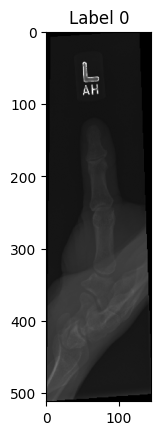

In [28]:
# show the label of the image
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

meta = pd.read_csv(f"{image_path}"+"\\train_labeled_studies.csv",header=None, 
                   names=['path','label'])
#for idx, row in meta.iterrows():
img = Image.open(f"{image_path}" + "\\train/XR_FINGER/patient00169/study1_negative/image1.png").convert("L")
# 根據path抓label
label_row = meta.loc[meta['path'] == "MURA-v1.1/train/XR_FINGER/patient00169/study1_negative/", 'label']
label = label_row.values[0] if not label_row.empty else "Unknown"
plt.imshow(img, cmap='gray')
plt.title(f"Label {label}")
plt.show()
    #break